<a href="https://colab.research.google.com/github/SwaRna-777/Assignment1/blob/main/AI_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import time

# Load MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN
X_train_cnn = X_train.reshape(-1,28,28,1)
X_test_cnn = X_test.reshape(-1,28,28,1)

# One-hot encode
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

num_classes = 10


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
def build_cnn_model(activations, optimizer_name):

    optimizer_dict = {
        "adam": tf.keras.optimizers.Adam(),
        "sgd": tf.keras.optimizers.SGD(),
        "rmsprop": tf.keras.optimizers.RMSprop()
    }

    model = Sequential([
        Conv2D(32, (3,3), activation=activations[0],
               padding='same', input_shape=(28,28,1)),
        MaxPooling2D((2,2)),
        Dropout(0.25),

        Conv2D(64, (3,3), activation=activations[1],
               padding='same'),
        MaxPooling2D((2,2)),
        Dropout(0.25),

        Flatten(),

        Dense(256, activation=activations[2]),
        Dropout(0.5),

        Dense(128, activation=activations[3]),
        Dense(128, activation=activations[4]),
        Dense(64, activation=activations[5]),
        Dense(64, activation=activations[5]),
        Dense(32, activation=activations[5]),

        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=optimizer_dict[optimizer_name],
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


comparsion

In [8]:
import numpy as np

np.random.seed(42)

indices = np.random.choice(len(X_train_cnn), 8000, replace=False)

X_train_cnn_small = X_train_cnn[indices]
y_train_cat_small = y_train_cat[indices]


activation_configs = {
    "All_ReLU": ['relu']*6,
    "All_Tanh": ['tanh']*6,
    "All_Sigmoid": ['sigmoid']*6
}

epochs_list = [2, 5, 10]     # As you requested
batch_size = 64              # Larger batch = faster

results_part1 = []

for name, acts in activation_configs.items():
    for ep in epochs_list:

        print(f"Training {name} | Epochs={ep}")

        start = time.time()

        model = build_cnn_model(acts, "adam")

        history = model.fit(
            X_train_cnn_small,   # ← smaller dataset
            y_train_cat_small,
            epochs=ep,
            batch_size=batch_size,
            validation_split=0.2,
            verbose=0
        )

        train_time = time.time() - start
        test_loss, test_acc = model.evaluate(X_test_cnn, y_test_cat, verbose=0)

        results_part1.append([
            name,
            ep,
            batch_size,
            round(test_acc,4),
            round(train_time,2)
        ])

df_part1 = pd.DataFrame(results_part1,
    columns=["Activation","Epochs","Batch_Size",
             "Test_Accuracy","Training_Time_Seconds"])

print("\n===== FAST ACTIVATION COMPARISON =====\n")
print(df_part1)


Training All_ReLU | Epochs=2


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training All_ReLU | Epochs=5
Training All_ReLU | Epochs=10
Training All_Tanh | Epochs=2
Training All_Tanh | Epochs=5
Training All_Tanh | Epochs=10
Training All_Sigmoid | Epochs=2
Training All_Sigmoid | Epochs=5
Training All_Sigmoid | Epochs=10

===== FAST ACTIVATION COMPARISON =====

    Activation  Epochs  Batch_Size  Test_Accuracy  Training_Time_Seconds
0     All_ReLU       2          64         0.9269                  12.55
1     All_ReLU       5          64         0.9706                   9.02
2     All_ReLU      10          64         0.9772                  11.44
3     All_Tanh       2          64         0.9615                   8.64
4     All_Tanh       5          64         0.9679                   9.36
5     All_Tanh      10          64         0.9730                  11.81
6  All_Sigmoid       2          64         0.0980                   7.86
7  All_Sigmoid       5          64         0.1135                   9.19
8  All_Sigmoid      10          64         0.1135         

In [9]:
activation_configs = {
    "All_ReLU": ['relu']*6,
    "All_Tanh": ['tanh']*6,
    "All_Sigmoid": ['sigmoid']*6
}

results_part1 = []

for name, acts in activation_configs.items():

    start = time.time()

    model = build_cnn_model(acts, "adam")

    history = model.fit(
        X_train_cnn, y_train_cat,
        epochs=5,
        batch_size=32,
        validation_split=0.2,
        verbose=0
    )

    train_time = time.time() - start
    test_loss, test_acc = model.evaluate(X_test_cnn, y_test_cat, verbose=0)

    results_part1.append([name, test_acc, round(train_time,2)])

df_part1 = pd.DataFrame(results_part1,
    columns=["Activation","Test_Accuracy","Training_Time"])

print(df_part1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    Activation  Test_Accuracy  Training_Time
0     All_ReLU         0.9916          41.60
1     All_Tanh         0.9858          35.71
2  All_Sigmoid         0.1135          36.10


In [10]:
activation_configs_mixed = {
    "Tanh_ReLU": ['tanh','tanh','relu','relu','relu','relu'],
    "Mixed_All": ['relu','tanh','sigmoid','relu','tanh','sigmoid'],
    "ReLU_Tanh_Sigmoid": ['relu','relu','tanh','tanh','sigmoid','sigmoid']
}

results_part2 = []

for name, acts in activation_configs_mixed.items():

    model = build_cnn_model(acts, "adam")

    history = model.fit(
        X_train_cnn, y_train_cat,
        epochs=5,
        batch_size=32,
        validation_split=0.2,
        verbose=0
    )

    test_loss, test_acc = model.evaluate(X_test_cnn, y_test_cat, verbose=0)

    results_part2.append([name, test_acc])

df_part2 = pd.DataFrame(results_part2,
                        columns=["Activation_Config","Test_Accuracy"])

print(df_part2)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


   Activation_Config  Test_Accuracy
0          Tanh_ReLU         0.9901
1          Mixed_All         0.9853
2  ReLU_Tanh_Sigmoid         0.9875


In [11]:
import numpy as np

np.random.seed(42)

indices = np.random.choice(len(X_train_cnn), 5000, replace=False)

X_train_small = X_train_cnn[indices]
y_train_small = y_train_cat[indices]


In [12]:
def build_cnn_model(activations, optimizer_name):

    optimizer_dict = {
        "adam": tf.keras.optimizers.Adam(),
        "sgd": tf.keras.optimizers.SGD(),
        "rmsprop": tf.keras.optimizers.RMSprop(),
        "adagrad": tf.keras.optimizers.Adagrad()
    }

    model = Sequential([
        Conv2D(32, (3,3), activation=activations[0],
               padding='same', input_shape=(28,28,1)),
        MaxPooling2D((2,2)),

        Conv2D(64, (3,3), activation=activations[1],
               padding='same'),
        MaxPooling2D((2,2)),

        Flatten(),

        Dense(128, activation=activations[2]),
        Dense(64, activation=activations[3]),
        Dense(64, activation=activations[4]),
        Dense(32, activation=activations[5]),
        Dense(32, activation=activations[5]),
        Dense(16, activation=activations[5]),

        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=optimizer_dict[optimizer_name],
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [13]:
activation_configs = {
    "All_ReLU": ['relu']*6,
    "All_Tanh": ['tanh']*6,
    "All_Sigmoid": ['sigmoid']*6,
    "Mixed": ['relu','tanh','sigmoid','relu','tanh','sigmoid']
}

optimizers = ["adam", "sgd", "rmsprop", "adagrad"]
batch_sizes = [32, 64, 128]
epochs_list = [2, 5, 10]

results = []

for act_name, acts in activation_configs.items():

    for opt in optimizers:

        for batch in batch_sizes:

            for ep in epochs_list:

                print(f"{act_name} | {opt} | Batch={batch} | Epochs={ep}")

                start = time.time()

                model = build_cnn_model(acts, opt)

                history = model.fit(
                    X_train_small,
                    y_train_small,
                    epochs=ep,
                    batch_size=batch,
                    verbose=0
                )

                train_time = time.time() - start

                test_loss, test_acc = model.evaluate(
                    X_test_cnn, y_test_cat, verbose=0
                )

                results.append([
                    act_name,
                    opt,
                    batch,
                    ep,
                    round(test_acc,4),
                    round(train_time,2)
                ])

df_results = pd.DataFrame(results,
    columns=[
        "Activation",
        "Optimizer",
        "Batch_Size",
        "Epochs",
        "Test_Accuracy",
        "Training_Time_Seconds"
    ])

print("\n===== FINAL 5K SAMPLE ANALYSIS =====\n")
print(df_results)


All_ReLU | adam | Batch=32 | Epochs=2


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


All_ReLU | adam | Batch=32 | Epochs=5
All_ReLU | adam | Batch=32 | Epochs=10
All_ReLU | adam | Batch=64 | Epochs=2
All_ReLU | adam | Batch=64 | Epochs=5
All_ReLU | adam | Batch=64 | Epochs=10
All_ReLU | adam | Batch=128 | Epochs=2
All_ReLU | adam | Batch=128 | Epochs=5
All_ReLU | adam | Batch=128 | Epochs=10
All_ReLU | sgd | Batch=32 | Epochs=2
All_ReLU | sgd | Batch=32 | Epochs=5
All_ReLU | sgd | Batch=32 | Epochs=10
All_ReLU | sgd | Batch=64 | Epochs=2
All_ReLU | sgd | Batch=64 | Epochs=5
All_ReLU | sgd | Batch=64 | Epochs=10
All_ReLU | sgd | Batch=128 | Epochs=2
All_ReLU | sgd | Batch=128 | Epochs=5
All_ReLU | sgd | Batch=128 | Epochs=10
All_ReLU | rmsprop | Batch=32 | Epochs=2
All_ReLU | rmsprop | Batch=32 | Epochs=5
All_ReLU | rmsprop | Batch=32 | Epochs=10
All_ReLU | rmsprop | Batch=64 | Epochs=2
All_ReLU | rmsprop | Batch=64 | Epochs=5
All_ReLU | rmsprop | Batch=64 | Epochs=10
All_ReLU | rmsprop | Batch=128 | Epochs=2
All_ReLU | rmsprop | Batch=128 | Epochs=5
All_ReLU | rmsprop 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step


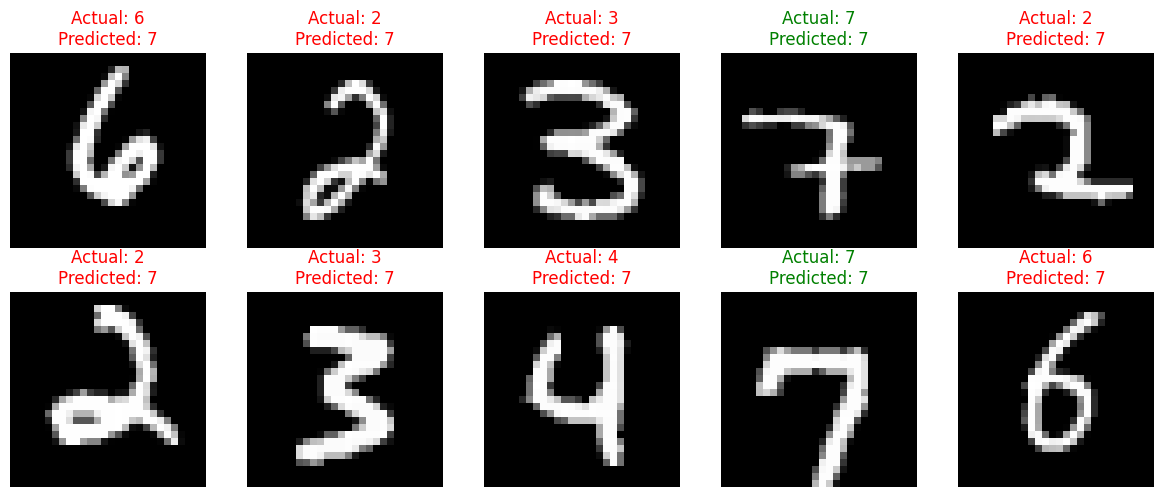

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Randomly select 10 test samples
np.random.seed(42)
random_indices = np.random.choice(len(X_test_cnn), 10, replace=False)

random_images = X_test_cnn[random_indices]
random_labels = y_test[random_indices]

# Make predictions
predictions = model.predict(random_images)
predicted_labels = np.argmax(predictions, axis=1)

# Plot results
plt.figure(figsize=(12,5))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(random_images[i].reshape(28,28), cmap='gray')

    color = "green" if random_labels[i] == predicted_labels[i] else "red"

    plt.title(
        f"Actual: {random_labels[i]}\nPredicted: {predicted_labels[i]}",
        color=color
    )

    plt.axis('off')

plt.tight_layout()
plt.show()



In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

for opt in df_results["Optimizer"].unique():

    subset = df_results[
        (df_results["Optimizer"] == opt) &
        (df_results["Batch_Size"] == 64) &
        (df_results["Activation"] == "All_ReLU")
    ]

    subset = subset.sort_values("Epochs")

    plt.plot(
        subset["Epochs"],
        subset["Test_Accuracy"],
        marker='o',
        label=opt
    )

plt.title("Validation Accuracy vs Epochs (Batch=64, ReLU)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'df_results' is not defined

<Figure size 800x600 with 0 Axes>